In [1]:
import os
import pandas as pd
import scanpy as sc
import liana as li

In [2]:
from plots import plot_lr_pairs, importances_heatmap

Supp Figure

In [3]:
ints = pd.read_csv(os.path.join('results', 'ct_interactions.csv'))

In [4]:
# set max and min importances to -5 and 5
ints['importances'] = ints['importances'].clip(-5, 5)

In [5]:
lrdata_all = sc.read_h5ad(os.path.join('results', 'lr', 'lrdata_all.h5ad'))

In [6]:
lr_loadings = li.ut.get_variable_loadings(lrdata_all, varm_key='NMF_H').set_index('index')

SUFIG

In [7]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns

/home/dbdimitrov/projects/liana2_manuscript/notebooks/kuppe/plots.py:116: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
/home/dbdimitrov/projects/liana2_manuscript/notebooks/kuppe/plots.py:119: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


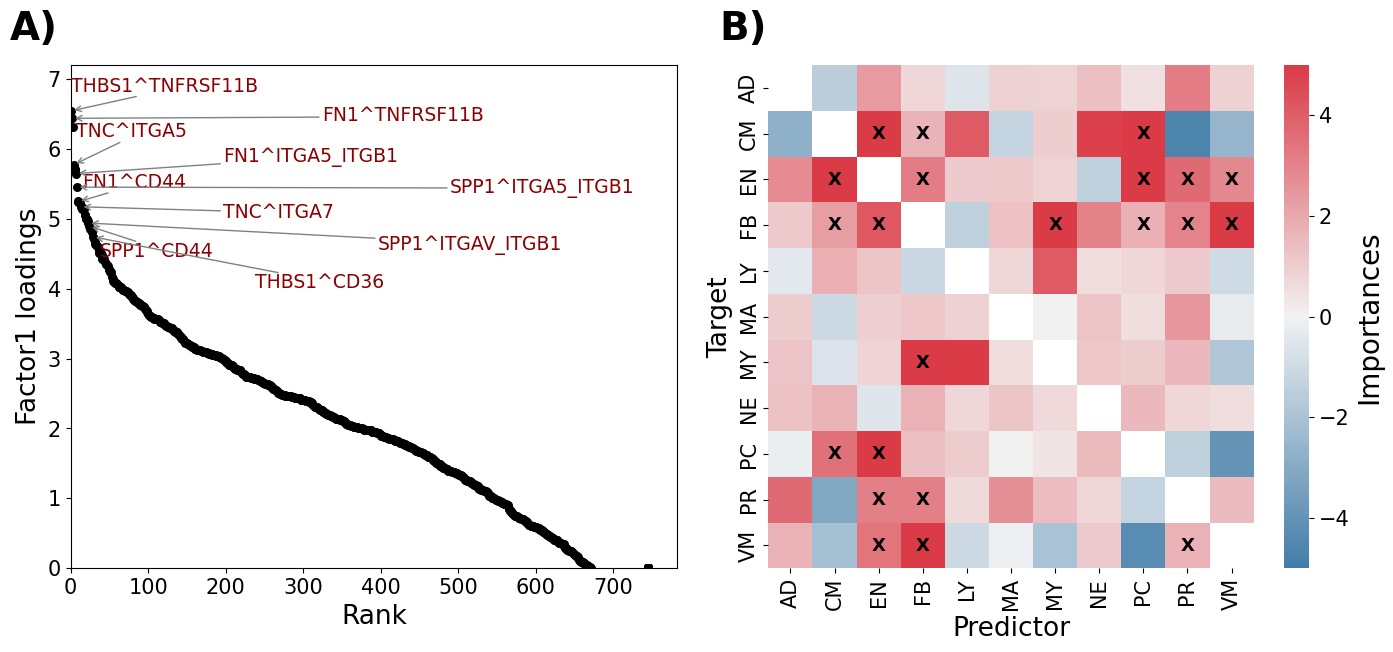

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_lr_pairs(lr_loadings,
              fct='Factor1',
              label_fun=lambda x: x['index'] if (any([s in x['index'] for s in ["FN1", 'TNC', 'THBS1', 'SPP1']]) and (x['rank'] <= 30)) else None,
              adjust_text_kwargs={'arrowprops': dict(arrowstyle='->', color='grey', lw=1), 
                                  'expand_text':(1.1, 1.5),
                                  'expand_points':(1.1, 1.5)
                                  },
              ax=ax1
              )
importances_heatmap(ints, 'target', 'predictor', 'importances', 'label', ax=ax2)
ax1.text(-0.1, 1.05, 'A)', transform=ax1.transAxes, size=28, weight='bold')
ax2.text(-0.1, 1.05, 'B)', transform=ax2.transAxes, size=28, weight='bold')

plt.subplots_adjust(wspace=0.15)
# plt.tight_layout()
plt.show()

In [9]:
# ax12.savefig(os.path.join('..', '..', 'figures', 'sufig_heart.pdf'))